# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |Gibrán Leonardo Chávez González   |
| **Fecha**      |03/02/2026   |
| **Expediente** |757366   |

## Regresión polinomial

Observa la siguiente gráfica.

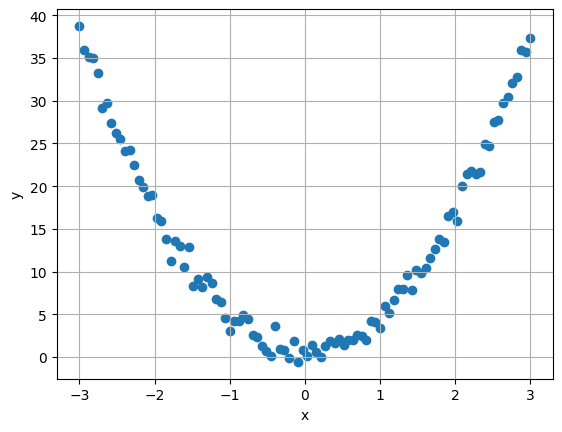

In [44]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [45]:
from sklearn.linear_model import LinearRegression 

In [46]:
X = x.reshape(-1, 1)


y_pred = 13.30223225795873 + -0.049554477435905686*x


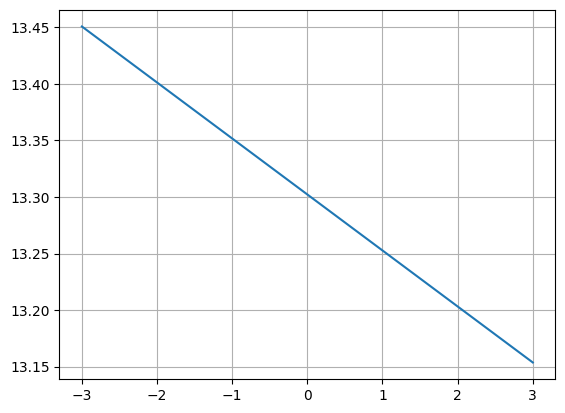

In [47]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
plt.plot(X, y_pred); plt.grid()
print(f'y_pred = {lr.intercept_} + {lr.coef_[0]}*x')

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

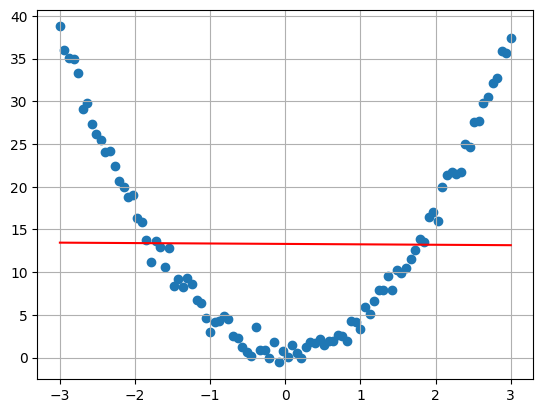

In [48]:
plt.scatter(x, y); plt.grid()
plt.plot(X, y_pred, color='red')

In [49]:
lr.score(X, y)

5.80345273922811e-05

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [50]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

In [51]:
polinomio = PolynomialFeatures(degree=2, include_bias=True) # Agregar el término independiente

In [52]:
X_squared = polinomio.fit_transform(X)
lr_squared = LinearRegression()
lr_squared.fit(X_squared, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
print(f'y_pred = {lr_squared.intercept_} + {lr_squared.coef_[1]}*x + {lr_squared.coef_[2]}*x^2')

y_pred = 0.619420963180481 + -0.049554477435907796*x + 4.143888838887943*x^2


In [54]:
lr_squared.score(X_squared, y)

0.9934118040713642

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

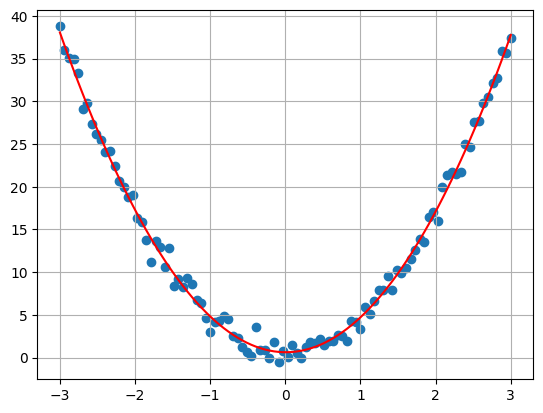

In [55]:
# Grafica de predicción cuadrática
y_pred_squared = lr_squared.predict(X_squared)
plt.scatter(x, y); plt.grid()
plt.plot(X, y_pred_squared, color='red')

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [56]:
for i in range(3, 12, 2):
    print(f'Polinomio grado {i}: ')
    polinomio_n = PolynomialFeatures(degree=i, include_bias=True)
    X_n = polinomio_n.fit_transform(X)
    lr_n = LinearRegression(); lr_n.fit(X_n, y)
    coef_str = ' + '.join([f'{lr_n.coef_[j]}*x^{j}' for j in range(1, i+1)])
    print(f'y_pred = {lr_n.intercept_} + {coef_str}')
    print(f'R^2 = {lr_n.score(X_n, y)}\n')

Polinomio grado 3: 
y_pred = 0.6194209631804739 + -0.06557539668243983*x^1 + 4.143888838887945*x^2 + 0.0029084754875263823*x^3
R^2 = 0.9934129585186598

Polinomio grado 5: 
y_pred = 0.6337116478282887 + -0.2763936436702452*x^1 + 4.128317457100218*x^2 + 0.11013569810390604*x^3 + 0.0019792017102039693*x^4 + -0.010516701779877133*x^5
R^2 = 0.9934954953676421

Polinomio grado 7: 
y_pred = 0.6101810919962443 + -0.17515561655575076*x^1 + 4.182199582073905*x^2 + 0.010743188554298037*x^3 + -0.015644659349959737*x^4 + 0.013333141387850241*x^5 + 0.00140889740491576*x^6 + -0.0016101279916721162*x^7
R^2 = 0.9935089341876935

Polinomio grado 9: 
y_pred = 0.5890185996503305 + -0.11077809780778307*x^1 + 4.265356530050819*x^2 + -0.09237321035287625*x^3 + -0.06555977957541147*x^4 + 0.057246422210592715*x^5 + 0.010850085066376275*x^6 + -0.008459372519180712*x^7 + -0.0005518406416846023*x^8 + 0.00035308156496892325*x^9
R^2 = 0.9935141799662259

Polinomio grado 11: 
y_pred = 0.5670839644973249 + 0.0900703

Crea una gráfica por cada modelo con las observaciones y su curva.

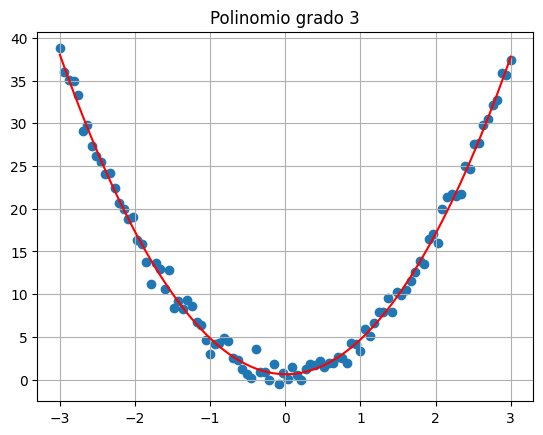

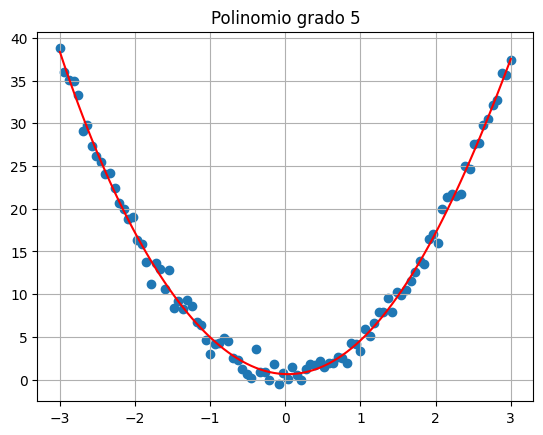

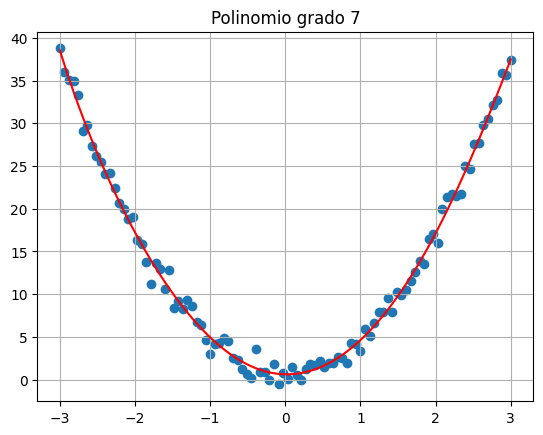

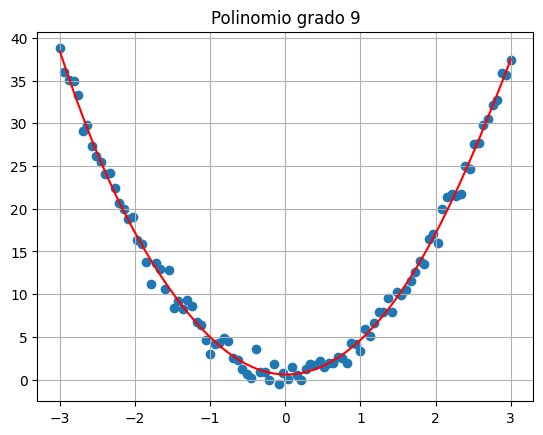

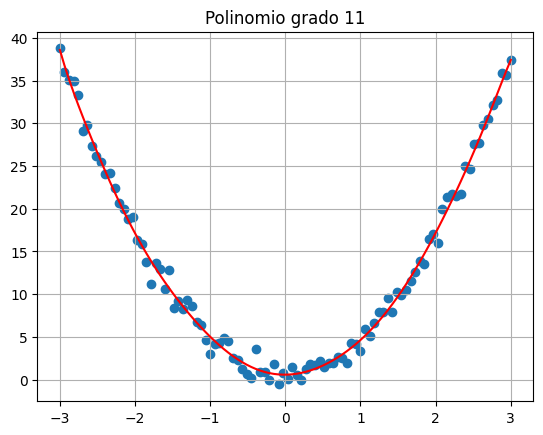

In [57]:
for i in range(3, 12, 2):
    plt.figure()
    polinomio_n = PolynomialFeatures(degree=i, include_bias=True)
    X_n = polinomio_n.fit_transform(X)
    lr_n = LinearRegression(); lr_n.fit(X_n, y)
    y_pred_n = lr_n.predict(X_n)
    plt.title(f'Polinomio grado {i}')
    plt.scatter(x, y); plt.grid()
    plt.plot(X, y_pred_n, color='red')
    

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

Por lógica diría que el modelo cuadrático, porque es la forma que tienen los puntos de la gráfica.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [58]:
# Para calcular los modelos con una x=5

polinomio_2 = PolynomialFeatures(degree=2, include_bias=True)
X_2 = polinomio_2.fit_transform(X)
lr_2 = LinearRegression(); lr_2.fit(X_2, y)
x_new = np.array([[5]])
x_new_poly = polinomio_2.transform(x_new)
y_new_pred = lr_2.predict(x_new_poly)
print(f'Predicción para x=5 con polinomio grado 2: y = {y_new_pred[0]}')

for i in range(3, 12, 2):
    polinomio_n = PolynomialFeatures(degree=i, include_bias=True)
    X_n = polinomio_n.fit_transform(X)
    lr_n = LinearRegression(); lr_n.fit(X_n, y)
    x_new = np.array([[5]])
    x_new_poly = polinomio_n.transform(x_new)
    y_new_pred = lr_n.predict(x_new_poly)
    print(f'Predicción para x=5 con polinomio grado {i}: y = {y_new_pred[0]}')

Predicción para x=5 con polinomio grado 2: y = 103.9688695481995
Predicción para x=5 con polinomio grado 3: y = 104.2523243879077
Predicción para x=5 con polinomio grado 5: y = 84.5989501267322
Predicción para x=5 con polinomio grado 7: y = 33.74321847608422
Predicción para x=5 con polinomio grado 9: y = 215.73637926425903
Predicción para x=5 con polinomio grado 11: y = -5265.344253554366


¿Cuál modelo crees que sea mejor?

Ahora se ve con más claridad que es el modelo cuadrado, no solo por su R^2 ni porque los puntos se asemejaran a una parábola, también porque da un valor bastante bien aporximado, a diferencia de los demás que se disparan a valores muy alejados.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3